In [1]:
import dpdata
import deepmd
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import MultipleLocator
from matplotlib import font_manager 

2025-06-08 09:17:33.707593: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-08 09:17:33.768169: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-08 09:17:33.768219: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-08 09:17:33.768230: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-08 09:17:33.777908: I tensorflow/core/platform/cpu_feature_g

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
data_dirs_1 = [	
                "/home/changsk/project/01-PbBi/01-init/01-Bi_c/POSCAR_Bi_c.01x01x01/02.md/sys-0064/deepmd",
                # "/home/changsk/project/01-PbBi/01-init/02-Bi_m/POSCAR_Bi_m.01x01x01/02.md/sys-0064/deepmd",
                # "/home/changsk/project/01-PbBi/01-init/03-Bi_t/POSCAR_Bi_t.01x01x01/02.md/sys-0032/deepmd",
                # "/home/changsk/project/01-PbBi/01-init/04-Pb_c/POSCAR_Pb_c.01x01x01/02.md/sys-0032/deepmd",
                # "/home/changsk/project/01-PbBi/01-init/05-Pb_h/POSCAR_Pb_h.01x01x01/02.md/sys-0036/deepmd",
                # "/home/changsk/project/01-PbBi/01-init/06-PbBi/POSCAR_PbBi.01x01x01/02.md/sys-0018-0018/deepmd",
                # "/home/changsk/project/01-PbBi/01-init/07-PbBi3/POSCAR_PbBi3.01x01x01/02.md/sys-0016-0048/deepmd",
                # "/home/changsk/project/01-PbBi/01-init/08-Pb4Bi/POSCAR_Pb4Bi.01x01x01/02.md/sys-0048-0012/deepmd"
                ]

data_dirs_2 = [	
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000000/02.fp/data.000",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000000/02.fp/data.001",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000000/02.fp/data.002",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000000/02.fp/data.006",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000000/02.fp/data.007",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000001/02.fp/data.000",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000001/02.fp/data.001",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000001/02.fp/data.002",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000001/02.fp/data.006",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000001/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000002/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000002/02.fp/data.001",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000002/02.fp/data.002",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000002/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000003/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000003/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000003/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000003/02.fp/data.003",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000003/02.fp/data.004",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000003/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000003/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000004/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000004/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000004/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000004/02.fp/data.004",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000004/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000004/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000005/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000005/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000005/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000005/02.fp/data.004",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000005/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000005/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000006/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000006/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000006/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000006/02.fp/data.003",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000006/02.fp/data.004",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000006/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000006/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000007/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000007/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000007/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000007/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000007/02.fp/data.007",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000008/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000008/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000008/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000008/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000008/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000009/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000009/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000009/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000009/02.fp/data.003",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000009/02.fp/data.004",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000009/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000009/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000010/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000010/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000010/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000010/02.fp/data.003",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000010/02.fp/data.004",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000010/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000010/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000011/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000011/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000011/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000011/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000011/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000012/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000012/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000012/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000012/02.fp/data.003",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000012/02.fp/data.004",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000012/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000012/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000013/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000013/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000013/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000013/02.fp/data.003",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000013/02.fp/data.004",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000013/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000013/02.fp/data.007",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000014/02.fp/data.000",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000014/02.fp/data.001",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000014/02.fp/data.002",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000014/02.fp/data.006",
                # "/home/changsk/project/01-PbBi/02-dpgen/iter.000014/02.fp/data.007",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000018/02.fp/data.005",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000020/02.fp/data.005",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000021/02.fp/data.005",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000024/02.fp/data.005",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000025/02.fp/data.005",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000026/02.fp/data.005",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000027/02.fp/data.005",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000028/02.fp/data.005",
				# "/home/changsk/project/01-PbBi/02-dpgen/iter.000029/02.fp/data.005"
                ]

dp_dir =  "/home/changsk/project/01-PbBi/02-dpgen/iter.000030/00.train/graph.000.pb"

In [20]:
datas_train = dpdata.MultiSystems()
datas_pred = dpdata.MultiSystems()

In [21]:
for data_dir in data_dirs_1:
    data_train = dpdata.LabeledSystem(data_dir, fmt='deepmd/npy')
    print(data_dir)
    data_pred = data_train.predict(dp_dir, driver="dp")
    datas_train.append(data_train)
    datas_pred.append(data_pred)
    

/home/changsk/project/01-PbBi/01-init/01-Bi_c/POSCAR_Bi_c.01x01x01/02.md/sys-0064/deepmd


2025-06-08 03:05:29.071702: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 29950 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0
2025-06-08 03:05:29.073704: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 36062 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:af:00.0, compute capability: 8.0
2025-06-08 03:06:50.640617: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.92GiB (rounded to 5282201600)requested by op load/filter_type_1/MatMul_6
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-06-08 03:06:50.640743: I tensorflow/tsl/framework/bfc_al

In [3]:
def load_multisystem(data_dirs, dp_dir):
    # 创建初始multisystem
    datas_train = dpdata.MultiSystems()
    datas_pred = dpdata.MultiSystems()
    # 载入目录地址中的结构
    for data_dir in data_dirs:
        data_train = dpdata.LabeledSystem(data_dir, fmt='deepmd/npy')
        data_pred = data_train.predict(dp_dir, driver="dp")
        datas_train.append(data_train)
        datas_pred.append(data_pred)

    # 输出multisystem基本信息
    element_map = datas_train[0].data['atom_names']
    n_strcture = len(datas_train)
    n_frames = datas_train.get_nframes()
    print("该MultiSystem中包含", element_map,"\n",n_strcture, "种结构\n", n_frames, "个数据")
    # 输出一个multisystem
    return datas_train, datas_pred

def get_e_from_datas(datas):
    list_e = np.array([])
    for data in datas:
        total_e = data.data['energies']
        n_atoms = data.get_natoms()
        atom_e = total_e / n_atoms
        list_e = np.concatenate((list_e,atom_e))
    return np.array(list_e)

def get_f_from_datas(datas):
    list_f = datas[0].data['forces']
    list_f = np.concatenate(list_f, axis=0)
    for i in range(1, len(datas)):
        b = datas[i].data['forces']
        b = np.concatenate(b, axis=0)
        list_f= np.concatenate((list_f,b))
    return list_f


In [43]:
# 图像函数

#  设置坐标轴数点
def major_formatter_x(x, pos):
    return f'{x:.1f}'

def major_formatter_y(y, pos):
    return f'{y:.1f}'

def set_plotparam(plot_params):
    fig, ax = plt.subplots(figsize=(4,4),dpi=300)               # DPI设置
    # 全局设置字体及大小，设置公式字体即可，若要修改刻度字体，可在此修改全局字体
    font_path = "/home/changsk/font"
    font_files = font_manager.findSystemFonts(fontpaths=font_path)
    for file in font_files:
        font_manager.fontManager.addfont(file)
    config = {
        "mathtext.fontset":'stix',
        "font.family":"Arial",
        "font.serif": ['serif'],
        "font.size": 20,            # 字号
        'axes.unicode_minus': False # 处理负号，即-号
    }
    rcParams.update(config)
    ax.spines['right'].set_visible(True)         # 坐标轴可见性 
    ax.spines['top'].set_visible(True)
    ax.spines['left'].set_linewidth(1.2)         # 坐标轴线框 
    ax.spines['bottom'].set_linewidth(1.2)
    ax.spines['bottom'].set_position(('data',plot_params['ys']))  # 移动x轴位置
    # plt.style.use
    # 设置坐标轴箭头
    #ax.plot(1, plot_params['ys'], ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    #ax.plot(plot_params['xs'], 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    plt.xlim(plot_params['xs'], plot_params['xe']+plot_params['xmajor_locator']*0.2)                               # x坐标轴刻度值范围
    plt.ylim(plot_params['ys'], plot_params['ye']+plot_params['ymajor_locator']*0.2)                               # y坐标轴刻度值范围
    plt.xlabel(plot_params['xlabel'],fontsize=16)                 # x坐标轴标题
    plt.ylabel(plot_params['ylabel'],fontsize=16)                 # y坐标轴标题
    
    # 创建x轴定位器，间隔2
    x_major_locator = MultipleLocator(plot_params['xmajor_locator'])
    # 创建y轴定位器，间隔5
    y_major_locator = MultipleLocator(plot_params['ymajor_locator'])
    # 设置x轴的间隔
    ax.xaxis.set_major_locator(x_major_locator)
    # 设置y轴的间隔
    ax.yaxis.set_major_locator(y_major_locator)
    
    # 修改有效小数位
    ax.xaxis.set_major_formatter(major_formatter_x)
    ax.yaxis.set_major_formatter(major_formatter_y)
    
    ax.tick_params(labelsize=14)  #刻度字体大小
    # 设置刻度线向外还是向内
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    return fig, ax

def get_error(list1, list2):
    list1 = list1.reshape(-1)
    list2 = list2.reshape(-1)
    MAE = np.mean(np.abs(list1 - list2))
    RMSE = np.sqrt(np.mean((list1 - list2) ** 2))
    y_mean = np.mean(list1)
    ss_tot = np.sum((list1 - y_mean) ** 2)
    ss_res = np.sum((list1 - list2) ** 2)
    R2 = 1 - (ss_res / ss_tot)
    return MAE, RMSE, R2

def get_extremum(list1, list2):
    mx = np.max(np.concatenate((list1, list2)))
    mn = np.min(np.concatenate((list1, list2)))
    return mx, mn

# 画e的散点图
def draw_e_scatter(list_e_train, list_e_pred):
    from scipy.stats import gaussian_kde
    xy = np.vstack([list_e_train, list_e_pred])
    z = np.abs(gaussian_kde(xy)(xy))
    z = (np.exp(z+0.5))/10
    # 计算极值
    max_e, min_e = get_extremum(list_e_train, list_e_pred)
    mae_e, rmse_e, r2_e = get_error(list_e_train, list_e_pred)
    xs_e = 1.05 * min_e
    xe_e = 0.95 * max_e
    plot_params_e = {
        "xs": xs_e,       # x轴起始坐标
        "xe": xe_e,        # x轴终点坐标
        "ys": xs_e,       # y轴起始坐标
        "ye": xe_e,        # y轴终点坐标
        "xlabel": r'DFT energy (eV/atom)',                    # x轴标题
        "ylabel": r'DP energy (eV/atom)',                    # y轴标题
        "xmajor_locator": 0.5,                # 设置x轴的间隔
        "ymajor_locator": 0.5,                # 设置y轴的间隔
    }

    fig, ax1 = set_plotparam(plot_params_e)
    ax1.plot((1.5 * min_e, 0.5 * max_e), (1.5 * min_e, 0.5 * max_e), c='grey', linestyle='--', linewidth=1)
    ax1.scatter(list_e_train, list_e_pred, s=5, c='#CE6C7B', alpha=0.8, edgecolor='none')
    # ax1.scatter(list_e_train, list_e_pred, vmin=0.2, vmax=1, c=z, s=0.2, alpha=0.8, cmap='Blues')
    ax1.text(xs_e + 0.05 * (xe_e - xs_e), xs_e + 0.8 * (xe_e - xs_e), f"MAE = {mae_e*1000:.2f} meV/atom\nRMSE = {rmse_e*1000:.2f} meV/atom\nR$^{{\\mathdefault{{2}}}}$ = {r2_e:.5f}",
            fontdict={'family': 'Arial', 'size': 14, 'weight': 'normal'})
    fig.show()
    print(mae_e, rmse_e, r2_e)
    fig.savefig("./energy_scatter.png", bbox_inches='tight', transparent=True)

# 画f的散点图
def draw_f_scatter(list_f_train, list_f_pred):
    # from scipy.stats import gaussian_kde
    # xy = np.vstack([list_f_train, list_f_pred])
    # z = np.abs(gaussian_kde(xy)(xy))
    # z = (np.exp(z+0.5))/4
    # 计算极值
    max_f, min_f = get_extremum(list_f_train, list_f_pred)
    mae_f, rmse_f, r2_f = get_error(list_f_train, list_f_pred)
    xs_f = 1.05 * min_f
    xe_f = 1.05 * max_f
    plot_params_f = {
        "xs": xs_f,       # x轴起始坐标
        "xe": xe_f,        # x轴终点坐标
        "ys": xs_f,       # y轴起始坐标
        "ye": xe_f,        # y轴终点坐标
        "xlabel": r'DFT force (eV/Å)',                    # x轴标题
        "ylabel": r'DP force (eV/Å)',                    # y轴标题
        "xmajor_locator": 4,                # 设置x轴的间隔
        "ymajor_locator": 4,                # 设置y轴的间隔
    }

    fig, ax = set_plotparam(plot_params_f)
    color_list = ['#8EB3DD', '#EE90A6', '#F6BFA3']
    label_list = ['x direction','y direction','z direction']
    ax.plot((1.5 * min_f, 1.5 * max_f), (1.5 * min_f, 1.5 * max_f), c='grey', linestyle='--', linewidth=1)
    ax.text(xs_f + 0.05 * (xe_f - xs_f), xs_f + 0.8 * (xe_f - xs_f),  f"MAE = {mae_f*1000:.2f} meV/Å\nRMSE = {rmse_f*1000:.2f} meV/Å\nR$^{{\\mathdefault{{2}}}}$ = {r2_f:.5f}", 
    fontdict={'family': 'Arial', 'size': 14, 'weight': 'normal'})
    # for i in range(3):
    #     ax.scatter(list_f_train[:, i], list_f_pred[:, i], s=5, c=color_list[i], alpha=1, edgecolors=None, label=label_list[i])
    ax.scatter(list_f_train, list_f_pred, s=5, c='#6684CC', alpha=0.8, edgecolors='none')
    ax.legend(facecolor='none', edgecolor='none', frameon=False)
    fig.show()
    print(mae_f, rmse_f,r2_f)
    fig.savefig("./force_scatter.png", bbox_inches='tight', transparent=True)
    

In [50]:
# 导入数据

list_e_train = get_e_from_datas(datas_train)
list_f_train = get_f_from_datas(datas_train)
list_e_pred = get_e_from_datas(datas_pred)
list_f_pred = get_f_from_datas(datas_pred)

In [25]:
# 保存数据为npy格式
# np.save("list_e_pred.npy", list_e_pred)

/tmp/ipykernel_98360/2033078592.py:99: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


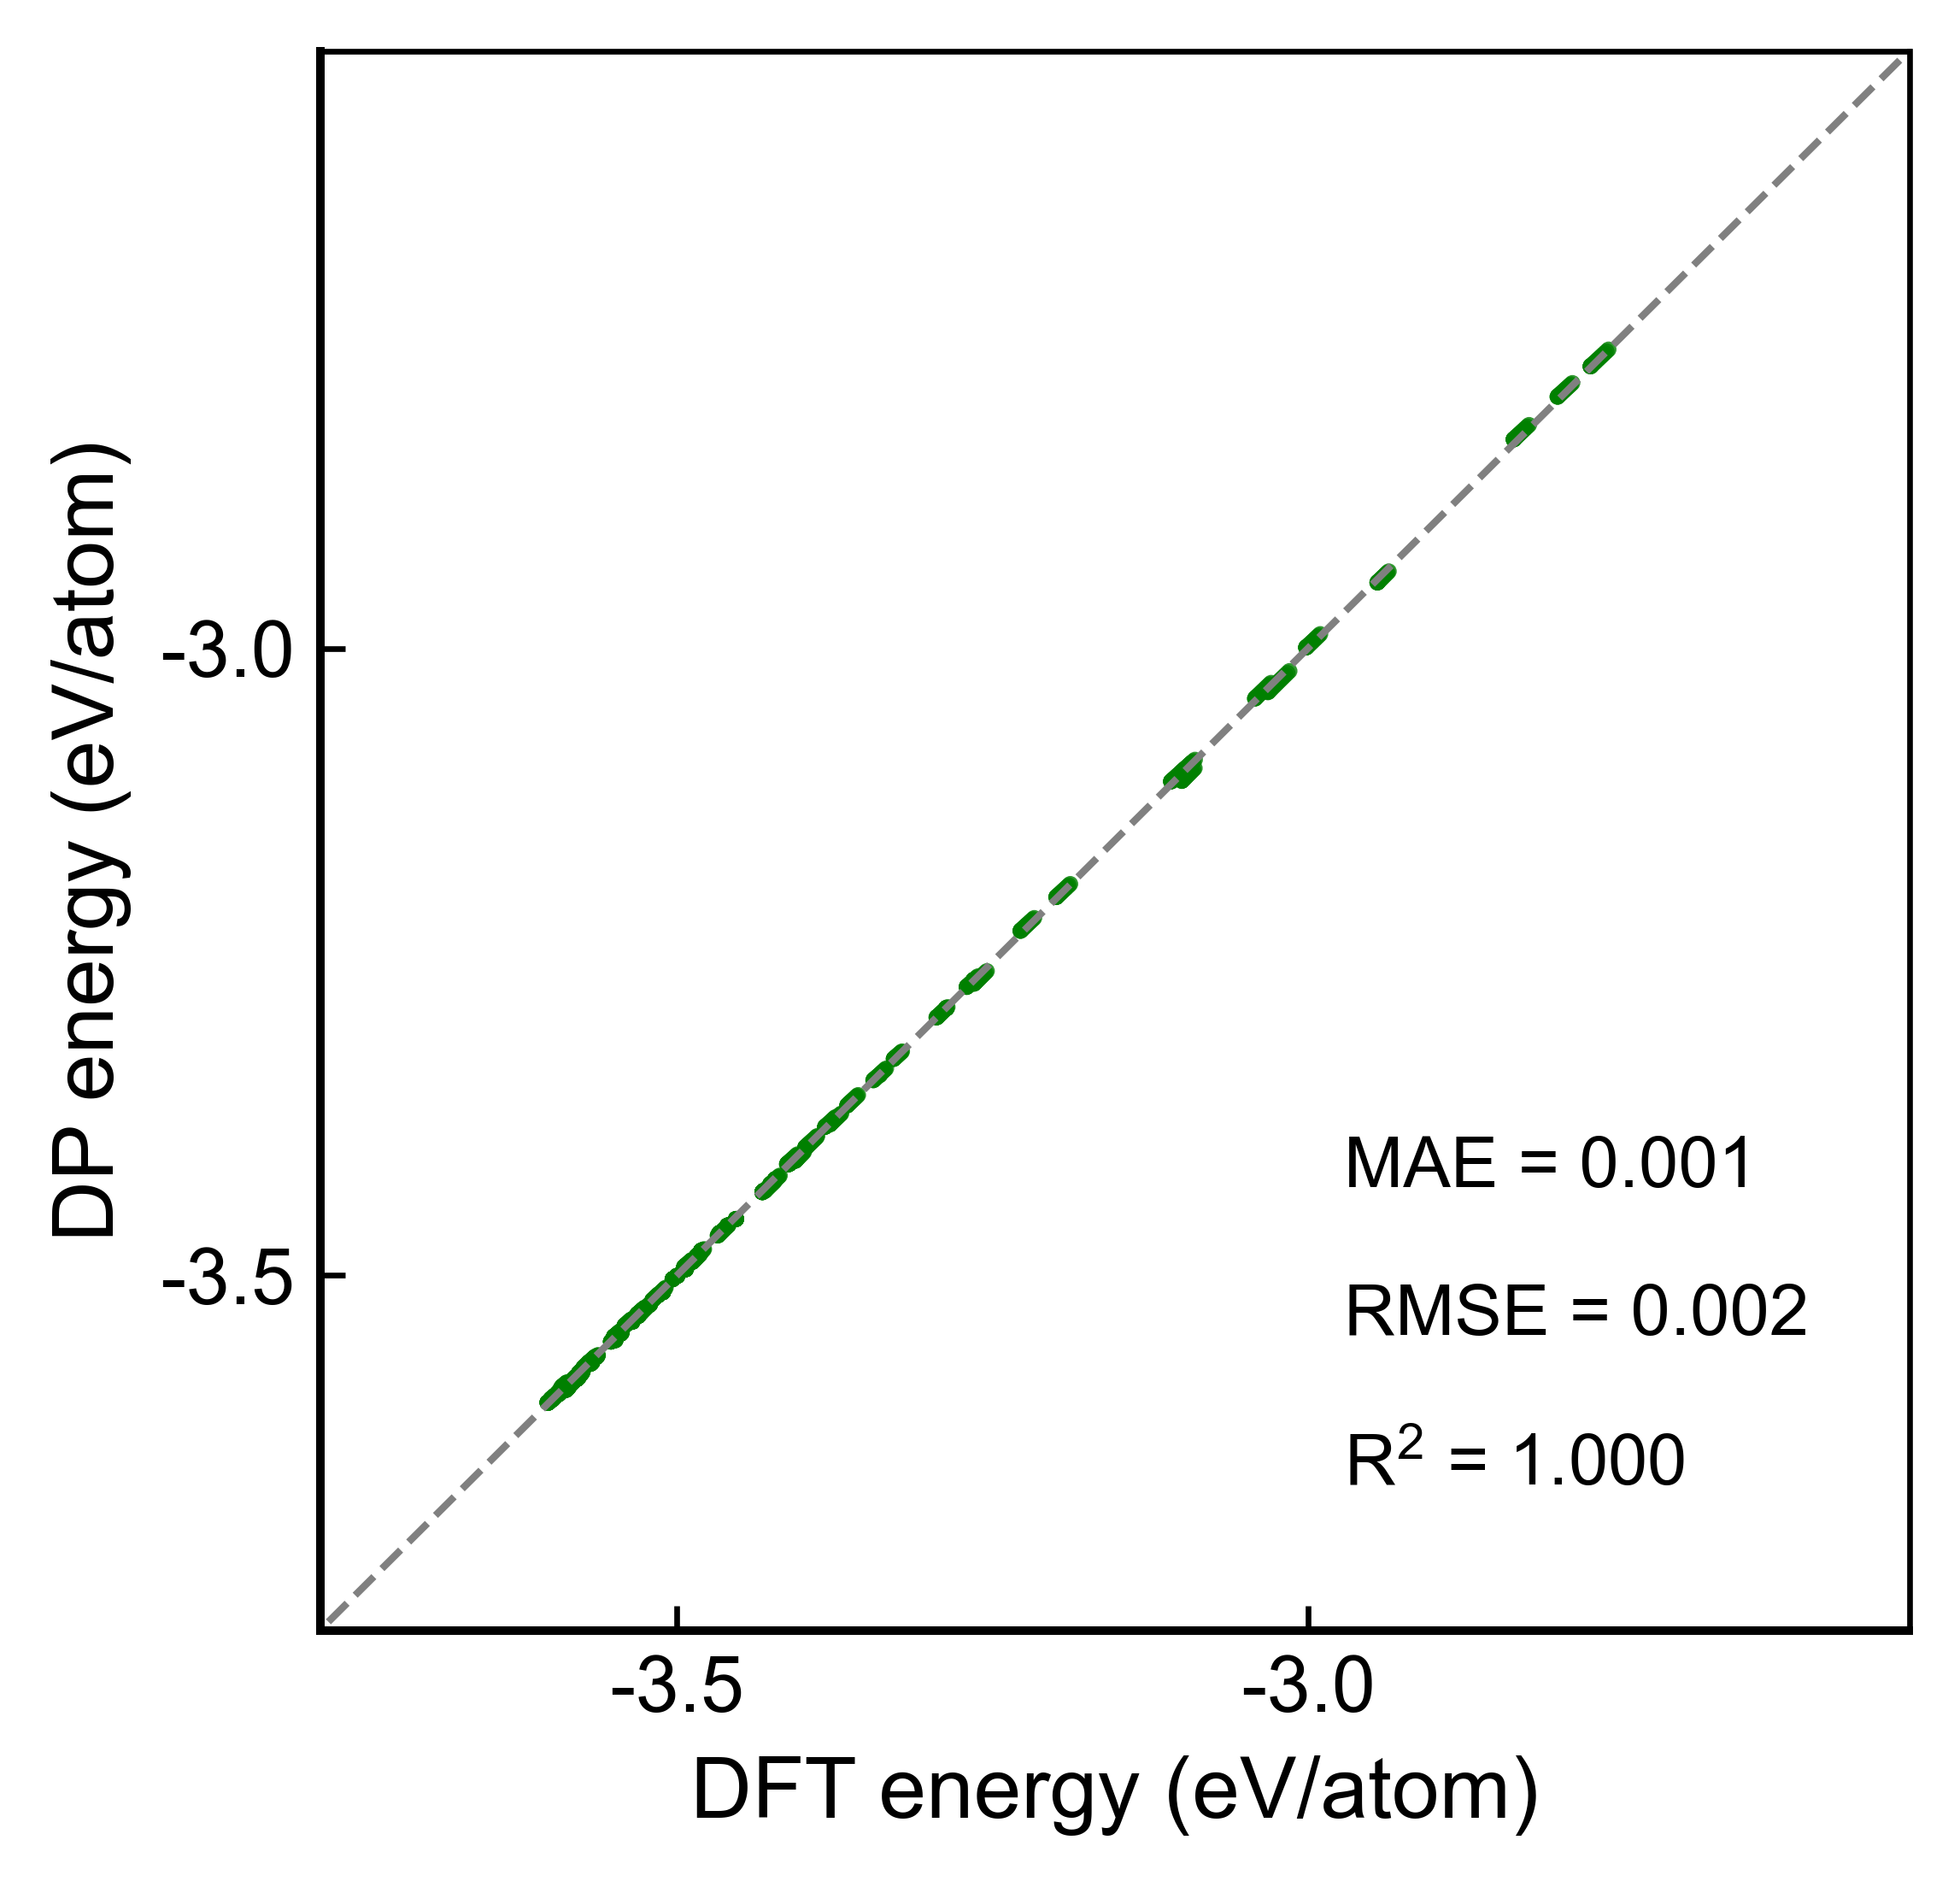

In [28]:
# 绘制能量散点图
draw_e_scatter(list_e_train, list_e_pred)

/tmp/ipykernel_88833/2033078592.py:132: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/changsk/anaconda3/deepmd/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/changsk/anaconda3/deepmd/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


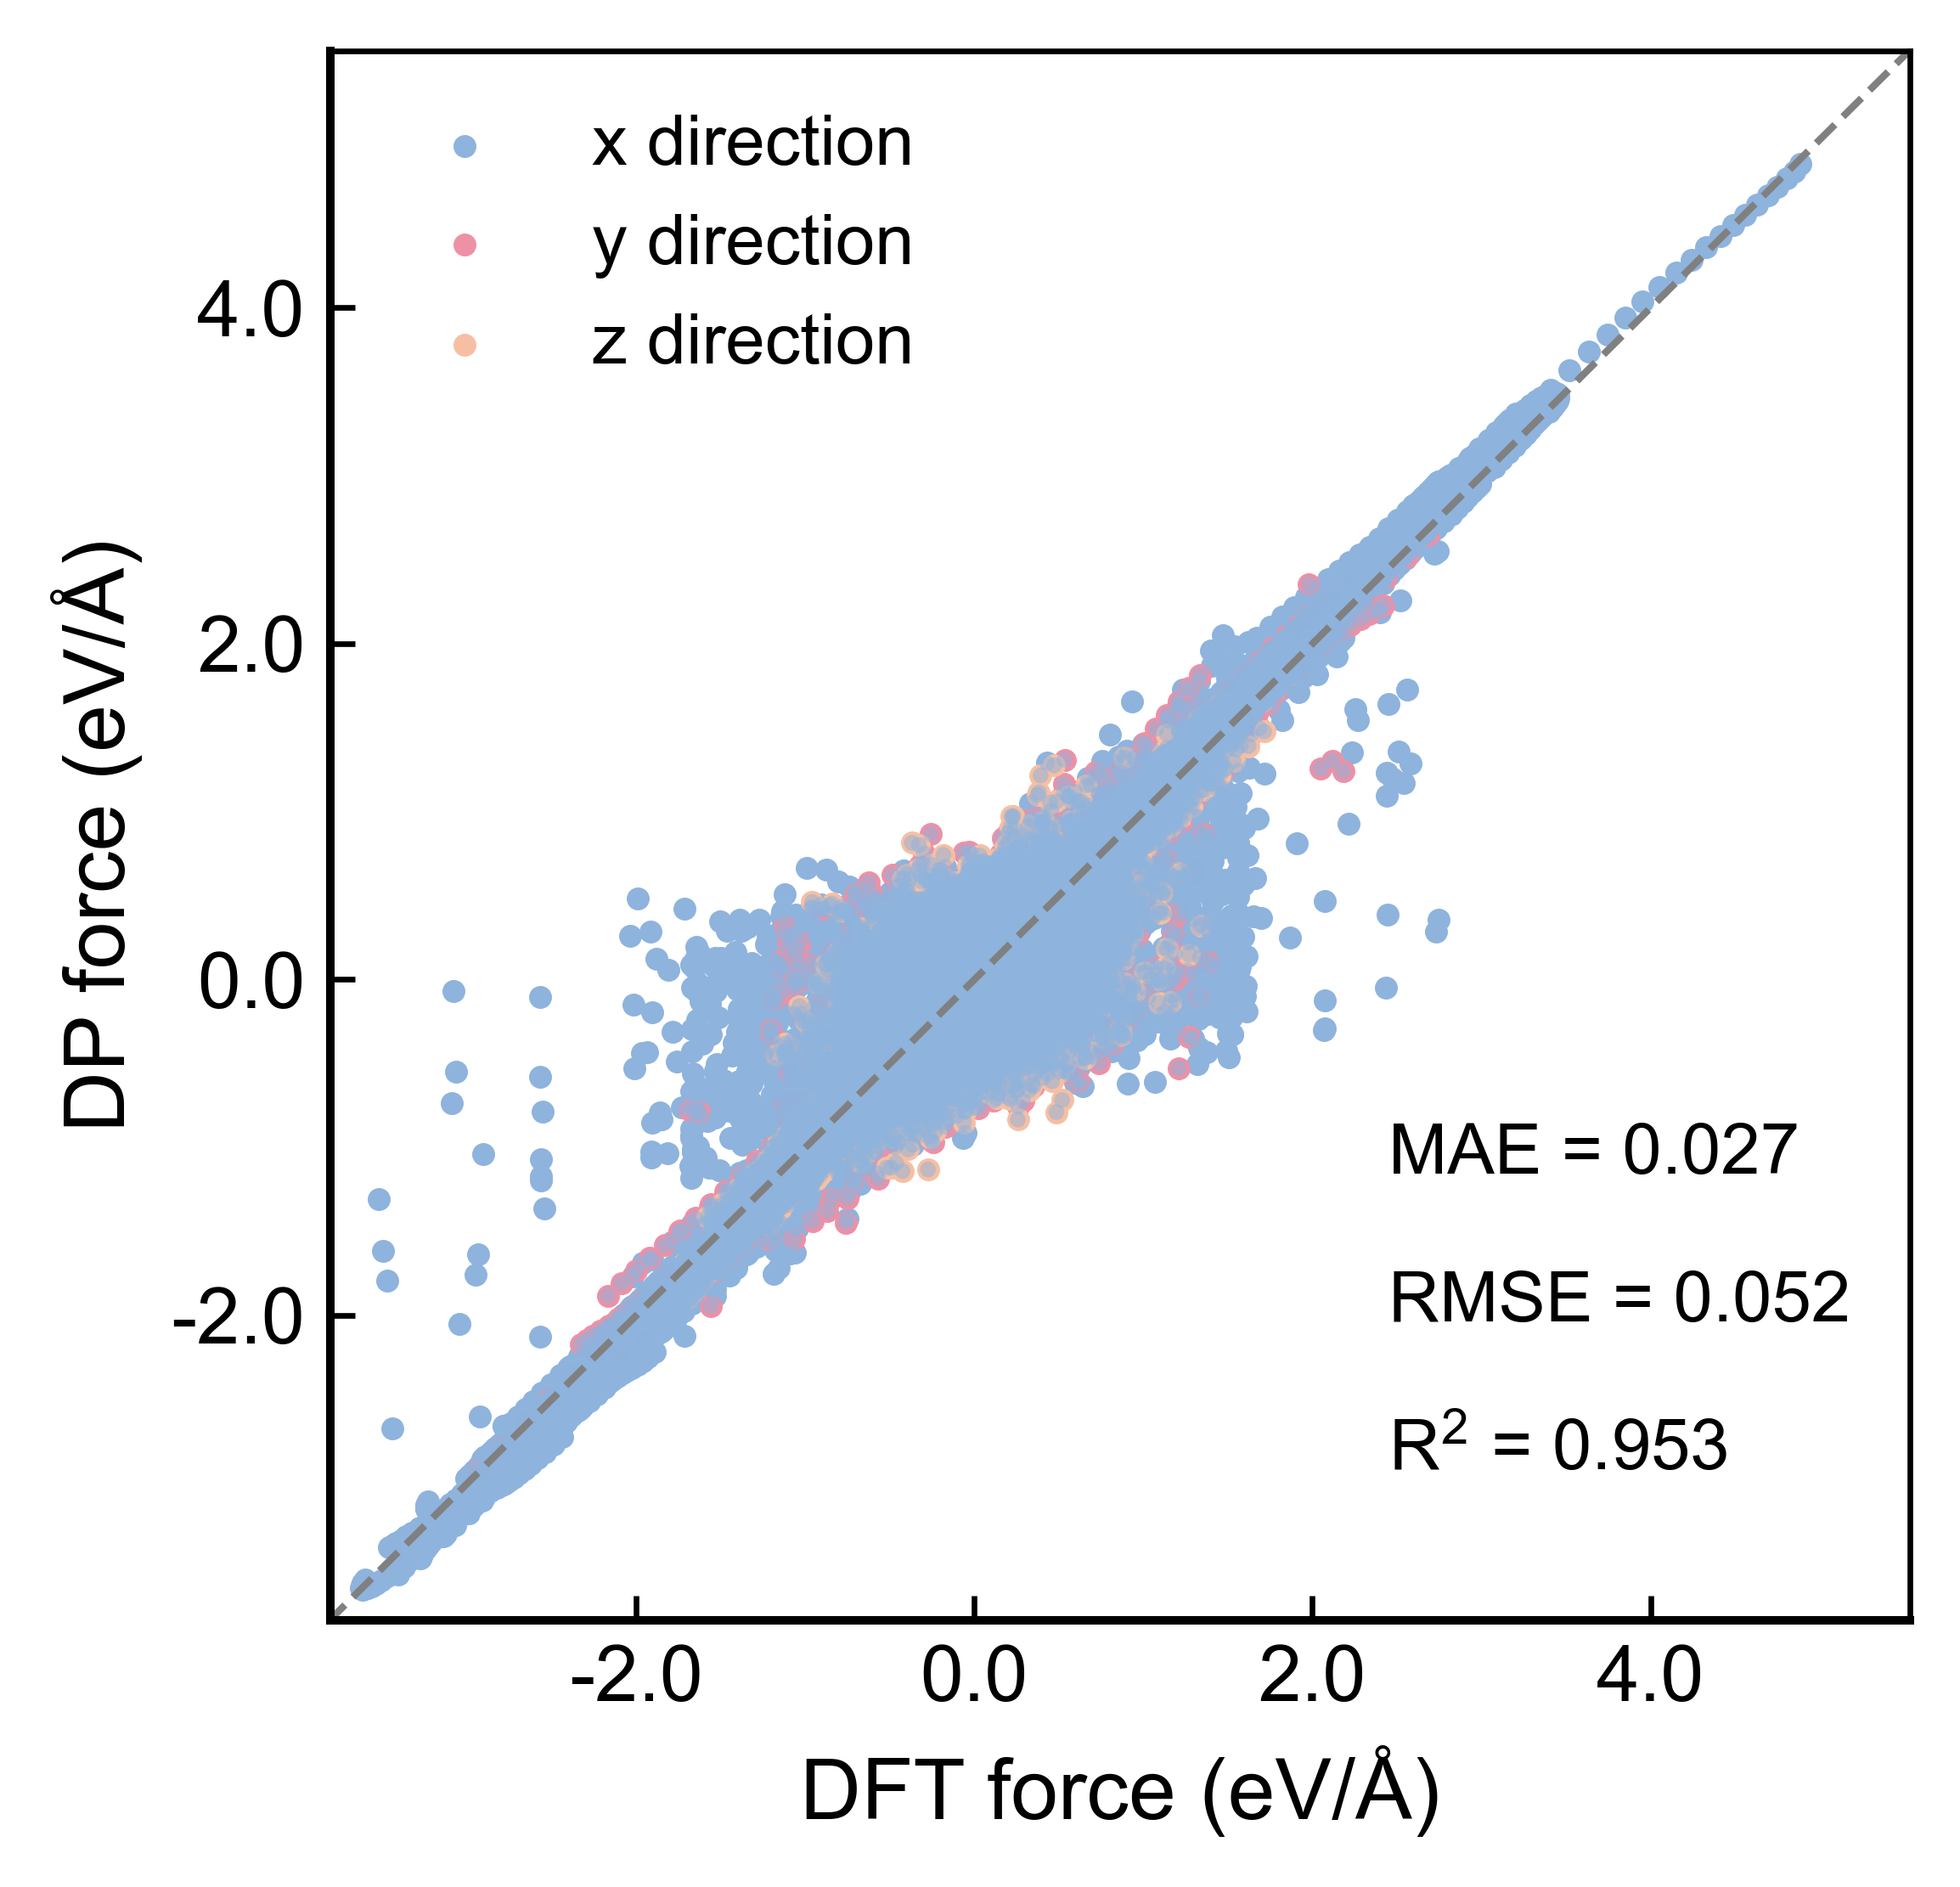

In [ ]:
# 绘制力散点图
draw_f_scatter(list_f_train, list_f_pred)

In [5]:
#####前面一起预测有问题，采取分开数据集预测并保存预测数据
###能量
list_e_train_all = np.array([])
list_e_pred_all = np.array([])
for i in range(105):
    list_e_train = np.load(f"/home/changsk/project/01-PbBi-post_deal/01-error-pca/e/list_e_train_{i}.npy")
    list_e_pred = np.load(f"/home/changsk/project/01-PbBi-post_deal/01-error-pca/e/list_e_pred_{i}.npy")
    list_e_train_all = np.concatenate((list_e_train_all,list_e_train))
    list_e_pred_all = np.concatenate((list_e_pred_all,list_e_pred))

###力
list_f_train_all = np.array([])
list_f_pred_all = np.array([])
for i in range(105):
    list_f_train = np.load(f"/home/changsk/project/01-PbBi-post_deal/01-error-pca/f/list_f_train_{i}.npy")
    list_f_pred = np.load(f"/home/changsk/project/01-PbBi-post_deal/01-error-pca/f/list_f_pred_{i}.npy")
    list_f_train_all = np.concatenate((list_f_train_all,list_f_train))
    list_f_pred_all = np.concatenate((list_f_pred_all,list_f_pred))


/tmp/ipykernel_116049/369069141.py:102: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


0.004364676840606314 0.005999145416653845 0.9992364217630851


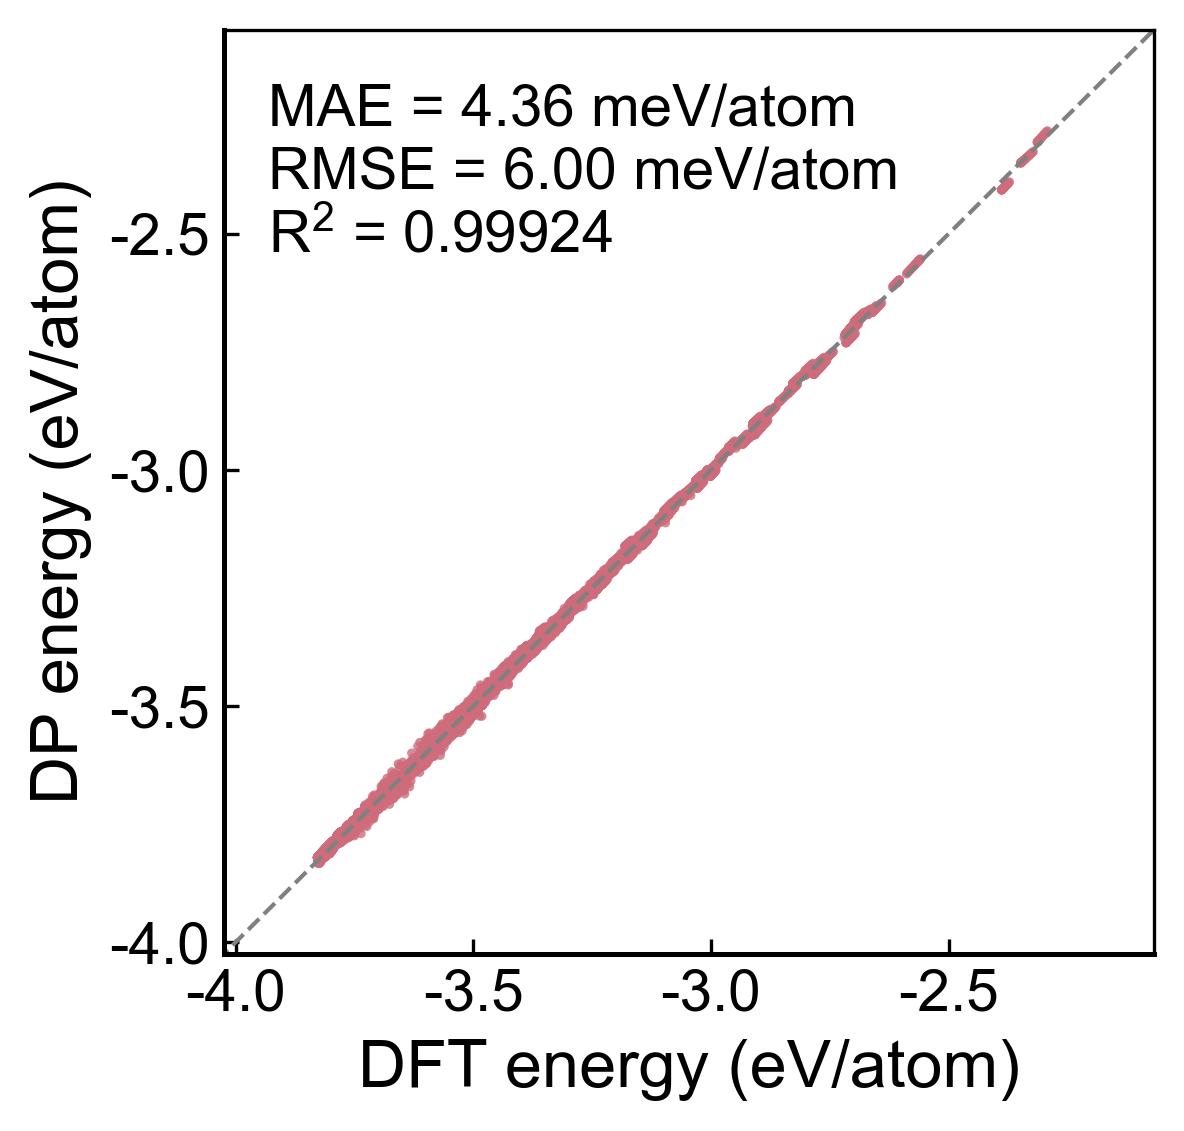

In [41]:
# 绘制能量散点图
draw_e_scatter(list_e_train_all, list_e_pred_all)

/tmp/ipykernel_116049/2942856981.py:137: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(facecolor='none', edgecolor='none', frameon=False)
/tmp/ipykernel_116049/2942856981.py:138: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


0.054463128573798494 0.08620332977464687 0.9578877006531198


/tmp/ipykernel_116049/2942856981.py:140: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig("./force_scatter.png", bbox_inches='tight', transparent=True)


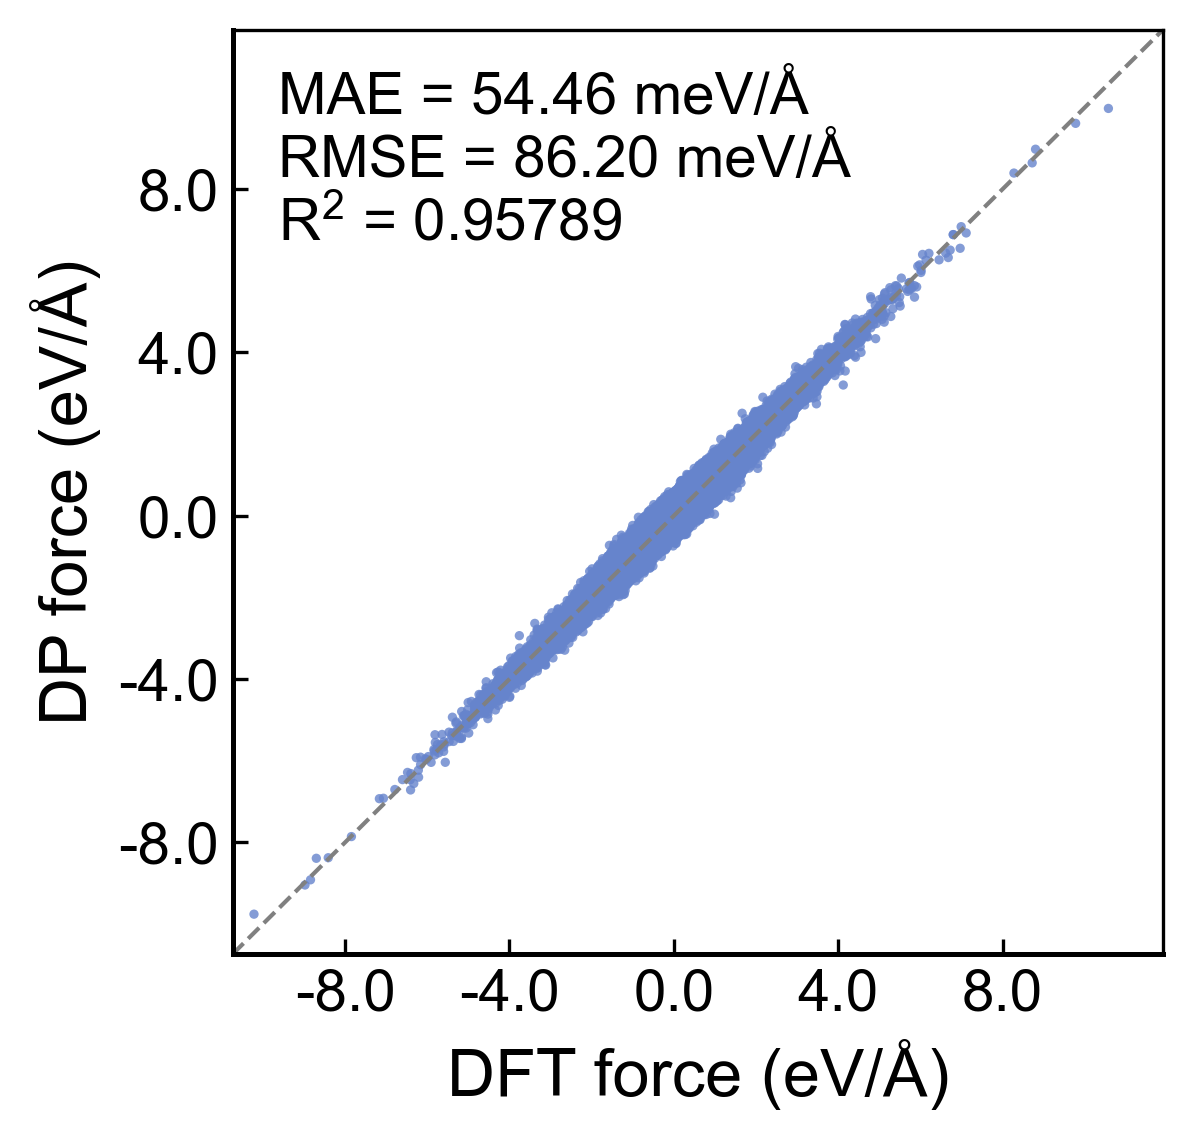

In [44]:
# 绘制力散点图
draw_f_scatter(list_f_train_all, list_f_pred_all)

In [63]:
for i in [7]:
    dp_dir = "/home/changsk/project/01-PbBi-post_deal/00-potentials/graph-compress.pb"
    list_e = np.array([])
    data_dir=data_dirs_1[i]
    data_train = dpdata.LabeledSystem(data_dir, fmt='deepmd/npy')
    data_pred = data_train.predict(dp_dir, driver="dp")

    total_e_train = data_train.data['energies']
    n_atoms_train = data_train.get_natoms()
    atom_e_train = total_e_train / n_atoms_train

    total_e_pred = data_pred.data['energies']
    n_atoms_pred = data_pred.get_natoms()
    atom_e_pred = total_e_pred / n_atoms_pred


    total_f_train = data_train.data['forces']
    total_f_train = total_f_train.reshape(-1)

    total_f_pred = data_pred.data['forces']
    total_f_pred = total_f_pred.reshape(-1)


    np.save(f"/home/changsk/project/01-PbBi-post_deal/01-error-pca/e/list_e_train_{i+97}.npy", atom_e_train)
    np.save(f"/home/changsk/project/01-PbBi-post_deal/01-error-pca/e/list_e_pred_{i+97}.npy", atom_e_pred)
    np.save(f"/home/changsk/project/01-PbBi-post_deal/01-error-pca/f/list_f_train_{i+97}.npy", total_f_train)
    np.save(f"/home/changsk/project/01-PbBi-post_deal/01-error-pca/f/list_f_pred_{i+97}.npy", total_f_pred)


2025-05-05 12:39:53.033712: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 28428 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0
2025-05-05 12:39:53.035809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 37823 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:af:00.0, compute capability: 8.0
